In [2]:
from google.colab import drive
import pandas as pd
import csv
import numpy as np
import math
import json
import ast
import matplotlib.pyplot as plt

drive.mount('/content/drive')
!ls "/content/drive/My Drive/SI671/Final"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
finalprojectsi671.ipynb  joinreview.py	Plot.ipynb     review_n.json
Inspection_La.json	 la.csv		preprocess.py


In [3]:
pip install scipy

In [4]:
review=pd.read_json('/content/drive/My Drive/SI671/Final/review_n.json',lines=True)
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,avg(stars)
0,jScBTQtdAt-8RshaiBEHgw,1,2018-05-28 20:56:05,0,j3vP8537KHvoXNHQIr3haA,5,"Party of 3 ordered the fish tacos, pork belly ...",1,Z_HE_KKT7N-WddPTzUQC7A,4.5
1,aNe8ofTYrealxqv7VtFTuw,0,2015-07-16 07:31:28,2,XAm4_-lUxzF_Y449cWMHLQ,1,Th service here is very hit or miss... Sometim...,0,ABUt9wCHRsSpa8i7rtNAuQ,3.5
2,5n2dA_QqO4c_7pSK0Of6AQ,1,2015-07-28 09:33:12,1,DmlGGWLHPAQl2v9qM5noyQ,1,I was told so many great things about this pla...,3,8fpiTkK4MO5jJIXHFV4t5Q,2.5
3,EdY6q0CO2mlATpoTFkvHAw,0,2017-02-19 08:49:25,0,rHGTcKIfLTE9Y26aNJ__Yw,2,Just ok. Not a fun true busy dim sum place and...,0,zN4M-hA86ps5I6BwXoqcqA,4.0
4,Yq7u6XXyDITG7I6yKAXU0g,7,2017-08-16 04:52:54,4,8ZLUN83zwoxM_SZ7NZlj2w,3,Well this was the first time trying this place...,9,zH6racrZ7rUqqv_Qy6dZDQ,3.0


In [5]:
print(review.info())
review=review[(abs(review['stars']-review['avg(stars)'])<=2.5)|(review['cool']+review['funny']+review['useful']>3)]
print(review.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257679 entries, 0 to 257678
Data columns (total 10 columns):
business_id    257679 non-null object
cool           257679 non-null int64
date           257679 non-null datetime64[ns]
funny          257679 non-null int64
review_id      257679 non-null object
stars          257679 non-null int64
text           257679 non-null object
useful         257679 non-null int64
user_id        257679 non-null object
avg(stars)     257679 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 19.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 248564 entries, 0 to 257678
Data columns (total 10 columns):
business_id    248564 non-null object
cool           248564 non-null int64
date           248564 non-null datetime64[ns]
funny          248564 non-null int64
review_id      248564 non-null object
stars          248564 non-null int64
text           248564 non-null object
useful         248564 non-null int6

In [0]:
dft=review[['business_id','text']].groupby('business_id').sum()

In [0]:
dft['text'][0]

'I love this marquetita is really clean price are ok and the customer service is great I really love coming here and get food I feel in Mexico lol where I\'m from yayFinally, a latino market on this side of town. I go easily twice a week. The produce is always fresh and the fresh meat is always on point. They also have fresh fruit salads, latino cookies, desserts. every product you may need from a local family market. The prices are reasonable, and the staff is so nice. They are always very attentive and friendly. If you cant find something just ask. Oh and lets not forget the good ole home made fresh breads made daily. I might see you there.Family owned and operated just be prepared to pay double for few different products other than that you may find ok prices very convenient for the south side of town in Spanish market the have a ready to eat meats on a deli tacoshop super if you need take out from a Mexican food on a reasonable price ...\nPlace is clean and the close early ...They 

In [0]:
insnv=pd.read_json('/content/drive/My Drive/SI671/Final/Inspection_La.json')

In [0]:
dft=dft.merge(insnv,how='left',on='business_id')

In [9]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1284
Data columns (total 9 columns):
business_id      1285 non-null object
text             1285 non-null object
Grade            1285 non-null float64
stars            1285 non-null float64
review_count     1285 non-null int64
name             1285 non-null object
Category_Name    1285 non-null object
attributes       1230 non-null object
categories       1285 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 100.4+ KB


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = dft['text']
vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=100000)
X_content=vectorizer.fit_transform(corpus)
X_content.shape

(1285, 100000)

In [0]:
#Restaurants' metadata Features
def dummy(df,coln,pref):
  df1=pd.get_dummies(df[coln],prefix=pref)
  return pd.concat([df.drop(coln, axis=1), df1], axis=1)

def explore_a(df,coln):
  df[coln]=df[coln].apply(lambda x:ast.literal_eval(x))
  df1=df[coln].apply(pd.Series)
  return pd.concat([df.drop(coln, axis=1), df1], axis=1)

def get_features_meta(df):
  df1=dummy(df,'Category_Name','CN')
  m1=df1.categories.astype(str).str.strip(',').str.get_dummies(',')
  m1=m1.drop([col for col, val in m1.sum().iteritems() if val < 50], axis=1)
  df1=pd.concat([df1.drop(['categories'], axis=1), m1], axis=1)

  ats=df1['attributes'].apply(pd.Series)
  ats=ats.dropna(axis=1,thresh=900)
  ats=ats.fillna(ats.mode().iloc[0])

  ats=explore_a(ats,'Ambience')
  ats=explore_a(ats,'BusinessParking')
  a1=pd.get_dummies(ats)
  a1=a1.fillna(ats.mode().iloc[0])
  df1=pd.concat([df1.drop(['attributes','Restaurants',' Restaurants',' Mexican'], axis=1), a1], axis=1)
  X=df1.drop(['business_id','Grade','name','stars','review_count'],axis=1)
  return X,df1
X_meta, df1=get_features_meta(dft.drop(['text'],axis=1))
X_opinion=dft[['stars','review_count']]
y_grade=dft['Grade']


92.61532199264613 94.0 100.0 32.0


Text(0, 0.5, 'Number of Restaurants')

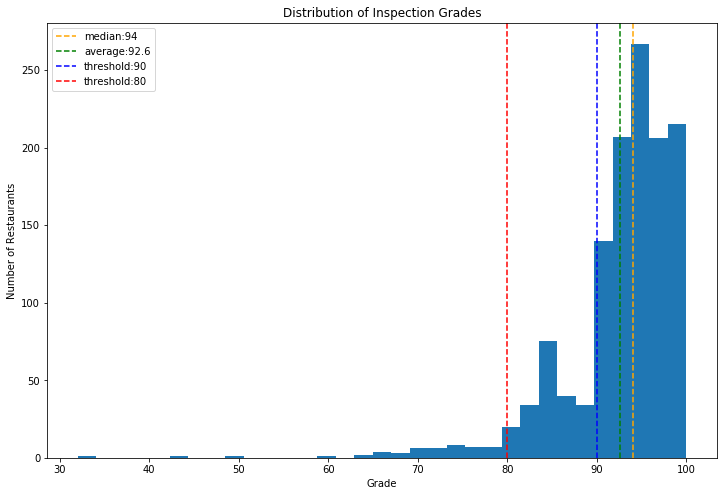

In [12]:
avg_grade=np.mean(y_grade)
median_grade=np.median(y_grade)
print(avg_grade,median_grade,max(y_grade),min(y_grade))

y_90=dft['Grade'].apply(lambda x:1 if x < 90 else 0)
y_80=dft['Grade'].apply(lambda x:1 if x < 80 else 0)
y_avg=dft['Grade'].apply(lambda x:1 if x < avg_grade else 0)
y_median=dft['Grade'].apply(lambda x:1 if x < median_grade else 0)

%matplotlib inline
plt.figure(figsize = (12, 8))

plt.hist(y_grade, bins=33)
plt.axvline(94, linestyle='dashed', color='orange',label='median:94')
plt.axvline(92.6, linestyle='dashed', color='g',label='average:92.6')
plt.axvline(90, linestyle='dashed', color='b',label='threshold:90')
plt.axvline(80, linestyle='dashed', color='r',label='threshold:80')
plt.legend()
plt.title('Distribution of Inspection Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Restaurants')

In [18]:
np.sum(y_median)/1284

0.4657320872274143

In [0]:
np.mean(y_80),np.mean(y_90)

(0.038910505836575876, 0.1953307392996109)

In [0]:
#df1=df1.drop(['name'],axis=1)
df1[df1.columns[1:]].corr()['Grade'][:]

Grade                             1.000000
stars                            -0.086770
review_count                     -0.025580
CN_Bakery Sales                  -0.017047
CN_Banquet Kitchen                0.007106
                                    ...   
HasTV_False                      -0.045201
HasTV_True                        0.045201
RestaurantsGoodForGroups_False    0.013879
RestaurantsGoodForGroups_None    -0.002606
RestaurantsGoodForGroups_True    -0.013489
Name: Grade, Length: 103, dtype: float64

In [0]:
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.linear_model import LinearRegression,SGDClassifier,Perceptron
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score,r2_score
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,MaxAbsScaler
from sklearn.model_selection import train_test_split

In [0]:
#select best features in X_meta
selectk=SelectKBest(chi2, k=10).fit(X_meta, y_90)
X_meta_best=selectk.transform(X_meta)
mask=selectk.get_support(indices=True) #list of booleans
feature_names=list(X_meta.columns.values)
params=selectk.get_params()
selected_features=[feature_names[i] for i in mask]
chi2_scores=[round(selectk.scores_[i],3) for i in mask]

In [20]:
from scipy.sparse import hstack,csr_matrix
def merge_features():
  X_1=csr_matrix(X_meta_best)
  print(X_1.shape)
  X_2=csr_matrix(X_opinion)
  print(X_2.shape)
  X=hstack((X_1,X_2,X_content))
  print(X.shape)
  return X
X_all=merge_features()

(1285, 10)
(1285, 2)
(1285, 100012)


In [0]:
'''
X_meta
X_opinion
X_content
X_all
y_grade
y_90
y_80
y_avg
y_median
'''

In [0]:
pipeline = Pipeline([('lr', LinearRegression()),])
parameters = {
    'lr__fit_intercept': (True,False),
    'lr__normalize': (True,False),}
#5-fold cross validation, MAE as score metrics
grid_search = GridSearchCV(pipeline, parameters,scoring='neg_mean_absolute_error', cv=5,n_jobs=-1, verbose=1)
grid_search.fit(X_meta_best, y_grade)
print("Best score:{}".format(grid_search.best_score_))
best_parameters = grid_search.best_estimator_.get_params()
print("Best parameters set:")
for param_name in sorted(parameters.keys()):
  print("\t{},{}".format(param_name, best_parameters[param_name]))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best score:-4.382018632493616
Best parameters set:
	lr__fit_intercept,True
	lr__normalize,False


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.9s finished


In [0]:
dfreg=pd.DataFrame([selected_features,chi2_scores,grid_search.best_estimator_[0].coef_]).rename(index={0:'Features',1:'Chi-squared',2:'Coefficient'})
latex1=dfreg.to_latex(index=False)
print((latex1))

\begin{tabular}{llllllllll}
\toprule
               0 &              1 &                    2 &         3 &          4 &           5 &        6 &        7 &                  8 &            9 \\
\midrule
 CN\_Bar / Tavern &  CN\_Restaurant &   Breakfast \& Brunch &   Burgers &   Japanese &   Nightlife &  Mexican &   trendy &  GoodForKids\_False &  WiFi\_'free' \\
          18.865 &          8.072 &                5.094 &     5.351 &     15.132 &       6.808 &   10.259 &    7.304 &              7.831 &        5.974 \\
       0.0672104 &       -2.74851 &             -1.09121 &   1.49428 &   -1.77249 &  -0.0377352 & -2.31964 & -1.27843 &             1.5529 &     0.868362 \\
\bottomrule
\end{tabular}



In [0]:
pipeline = Pipeline([('scaler',MaxAbsScaler()),('clf', SGDClassifier()),])
parameters = {
    'clf__max_iter': (10,100,1000,2000),
    'clf__alpha': (0.00001,0.0001,0.001),
    'clf__penalty': ('l1','l2', 'elasticnet'),
    'clf__loss':('hinge','log'),
    }
#5-fold cross validation, MAE as score metrics
grid_search = GridSearchCV(pipeline, parameters,scoring='accuracy', cv=5,n_jobs=-1, verbose=0)
for y in [y_80,y_90,y_avg,y_median]:
  grid_search.fit(X_meta_best, y) 
  print("Best score:{}".format(round((grid_search.best_score_),3)))
  best_parameters = grid_search.best_estimator_.get_params()
  print("Best parameters set:")
  for param_name in sorted(parameters.keys()):
    print("\t{},{}".format(param_name, best_parameters[param_name]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Best score:0.961
Best parameters set:
	clf__alpha,1e-05
	clf__loss,hinge
	clf__max_iter,10
	clf__penalty,l1


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Best score:0.806
Best parameters set:
	clf__alpha,0.001
	clf__loss,log
	clf__max_iter,10
	clf__penalty,l1
Best score:0.596
Best parameters set:
	clf__alpha,0.001
	clf__loss,log
	clf__max_iter,1000
	clf__penalty,elasticnet
Best score:0.585
Best parameters set:
	clf__alpha,0.001
	clf__loss,log
	clf__max_iter,1000
	clf__penalty,elasticnet


In [0]:
'''
The result we get:
Features 'threshold:80','threshold:90','average:92.6','median:94'
meta& 0.961& 0.805& 0.598& 0.586
meta_best_10& 0.961& 0.807& 0.595& 0.595
opinion & 0.961&0.805&0.561&0.551
unigram& 0.940&0.736&0.552&0.575
bigram& 0.964&0.795&0.609&0.609
trigram& 0.964&0.803&0.588&0.614
unigram+bigram& 0.946&0.811&0.609&0.619
unigram+bigram+trigram& 0.940&0.795&0.541&0.585
meta_best_10+opinion+trigram 0.966&0.801&0.601&0.591
'''

Text(0.5, 0, 'Inspection Score Threshold')

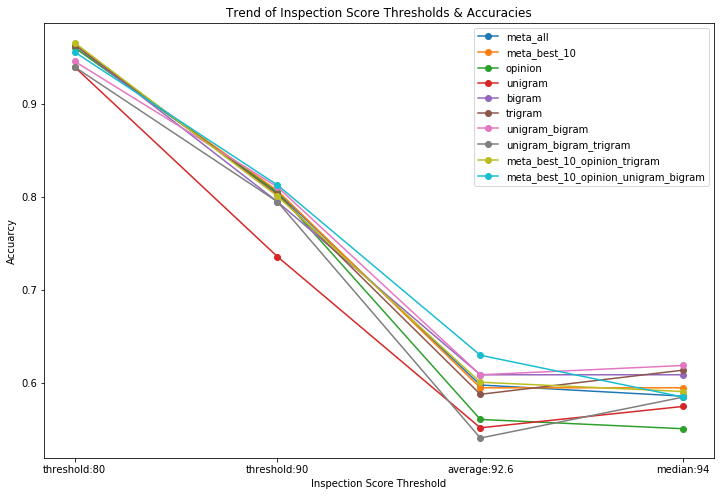

In [0]:
x=['threshold:80','threshold:90','average:92.6','median:94']
meta=[0.961,0.805,0.598,0.586]
meta_best_10=[0.961, 0.807, 0.595, 0.595]
opinion=[0.961,0.805,0.561,0.551]
unigram=[0.940,0.736,0.552,0.575]
bigram=[0.964,0.795,0.609,0.609]
trigram= [0.964,0.803,0.588,0.614]
unigram_bigram= [0.946,0.811,0.609,0.619]
unigram_bigram_trigram= [0.940,0.795,0.541,0.585]
meta_best_10_opinion_trigram= [0.966,0.801,0.601,0.591]
meta_best_10_opinion_unigram_bigram=[0.956,0.813,0.630,0.585]
plt.figure(figsize = (12, 8))
plt.plot(x,meta,label='meta_all', marker='o')
plt.plot(x,meta_best_10,label='meta_best_10', marker='o')
plt.plot(x,opinion,label='opinion', marker='o')
plt.plot(x,unigram,label='unigram', marker='o')
plt.plot(x,bigram,label='bigram', marker='o')
plt.plot(x,trigram,label='trigram', marker='o')
plt.plot(x,unigram_bigram,label='unigram_bigram', marker='o')
plt.plot(x,unigram_bigram_trigram,label='unigram_bigram_trigram', marker='o')
plt.plot(x,meta_best_10_opinion_trigram,label='meta_best_10_opinion_trigram', marker='o')
plt.plot(x,meta_best_10_opinion_unigram_bigram,label='meta_best_10_opinion_unigram_bigram', marker='o')

plt.legend()
plt.title('Trend of Inspection Score Thresholds & Accuracies')
plt.ylabel('Accuarcy')
plt.xlabel('Inspection Score Threshold')

Text(0, 0.5, 'Score')

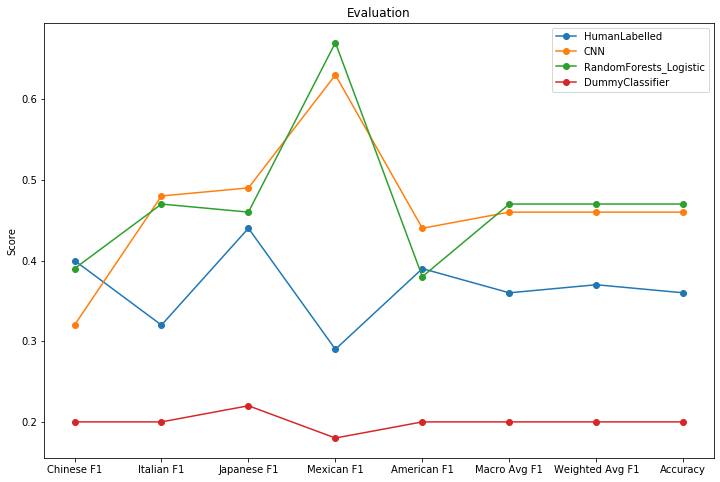

In [175]:
x=['Chinese F1','Italian F1','Japanese F1','Mexican F1','American F1','Macro Avg F1','Weighted Avg F1','Accuracy']
DummyClassifier=[0.2,0.2,0.22,0.18,0.2,0.2,0.2,0.2]
RandomForests_Logistic=[0.39,0.47,0.46,0.67,0.38,0.47,0.47,0.47]
CNN=[0.32,0.48,0.49,0.63,0.44,0.46,0.46,0.46]
HumanLabelled=[0.4,0.32,0.44,0.29,0.39,0.36,0.37,0.36]

plt.figure(figsize = (12, 8))
plt.plot(x,HumanLabelled,label='HumanLabelled', marker='o')
plt.plot(x,CNN,label='CNN', marker='o')
plt.plot(x,RandomForests_Logistic,label='RandomForests_Logistic', marker='o')
plt.plot(x,DummyClassifier,label='DummyClassifier', marker='o')

plt.legend()
plt.title('Evaluation')
plt.ylabel('Score')


Text(0, 0.5, 'Score')

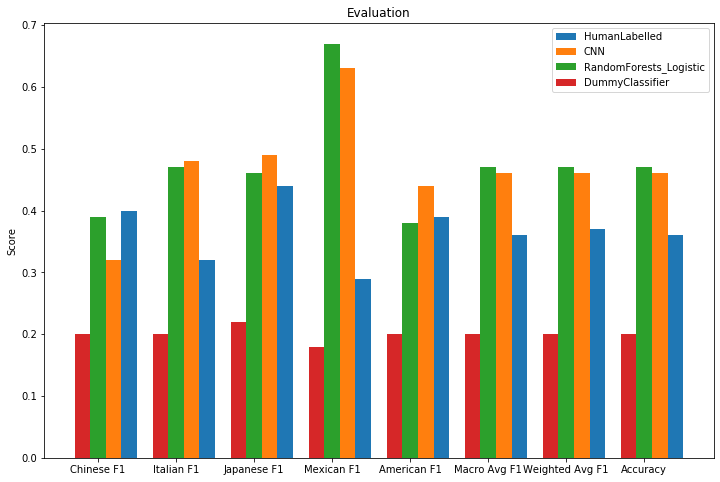

In [176]:
barWidth = 0.2

r1 = np.arange(len(Dummy_Classifier))
r2 = [x + 0.2 for x in r1]
r3 = [x + 0.2 for x in r2]
r4 = [x + 0.2 for x in r3]

plt.figure(figsize = (12, 8))
plt.bar(r4,HumanLabelled,width=barWidth,label='HumanLabelled')
plt.bar(r3,CNN,width=barWidth,label='CNN')
plt.bar(r2,RandomForests_Logistic,width=barWidth,label='RandomForests_Logistic')
plt.bar(r1,Dummy_Classifier, width=barWidth,label='DummyClassifier')

plt.xticks([r + barWidth for r in range(len(Dummy_Classifier))], x)

plt.legend()
plt.title('Evaluation')
plt.ylabel('Score')

In [116]:
x = np.random.randn(1000, 3)
dfplot.shape

(4, 8)

In [0]:
from sklearn.linear_model import SGDClassifier

for y in [y_80,y_90,y_avg,y_median]:
  X_train, X_test, y_train, y_test = train_test_split(X_content, y, test_size=0.3)
  text_clf_svm =  SGDClassifier(loss='hinge', penalty='l2',alpha=0.00001,max_iter=1000)
  text_clf_svm.fit(X_train, y_train)
  predicted_svm = text_clf_svm.predict(X_test)
  print(round(text_clf_svm.score(X_test,y_test),3))
'''
X_content
X_meta
X_meta_best
X_opinion
'''

0.964
0.793
0.655
0.635


'\nX_content\nX_meta\nX_meta_best\nX_opinion\n'

In [0]:
from sklearn.linear_model import SGDClassifier
scaler=MaxAbsScaler().fit(X_all)
X_all_scaled=scaler.transform(X_all)
for y in [y_80,y_90,y_avg,y_median]:
  X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y, test_size=0.3)
  text_clf_svm =  SGDClassifier(loss='log', penalty='l2',alpha=0.00001,max_iter=1000)
  text_clf_svm.fit(X_train, y_train)
  predicted_svm = text_clf_svm.predict(X_test)
  print(round(text_clf_svm.score(X_test,y_test),3))

0.951
0.803
0.648
0.585


In [19]:
from scipy.sparse import hstack,csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = dft['text']
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=100000)
X_content=vectorizer.fit_transform(corpus)
X_content.shape
X_all=merge_features()

(1285, 10)
(1285, 2)
(1285, 100012)


In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler',MaxAbsScaler()),('clf', SGDClassifier()),])
parameters = {
    'clf__alpha': (0.00001,0.0001,0.001),
    'clf__penalty': ('l1','l2', 'elasticnet'),
    'clf__loss':('hinge','log'),}
grid_search = GridSearchCV(pipeline, parameters, cv=5,n_jobs=-1, verbose=1)
grid_search.fit(X_all, y_90)
print("Best score:{}".format(grid_search.best_score_))
best_parameters = grid_search.best_estimator_.get_params()
print("Best parameters set:")
for param_name in sorted(parameters.keys()):
  print("\t{},{}".format(param_name, best_parameters[param_name]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.7min finished


Best score:0.7836575875486381
Best parameters set:
	clf__alpha,0.001
	clf__loss,log
	clf__penalty,l2


In [43]:
from sklearn.linear_model import SGDClassifier
scaler=MaxAbsScaler().fit(X_all)
X_all_scaled=scaler.transform(X_all)
for y in [y_80,y_90,y_avg,y_median]:
  X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y, test_size=0.3)
  text_clf_svm =  SGDClassifier(loss='log', penalty='l2',alpha=0.001,max_iter=1000)
  text_clf_svm.fit(X_train, y_train)
  predicted_svm = text_clf_svm.predict(X_test)
  print(round(text_clf_svm.score(X_test,y_test),3))

0.956
0.819
0.642
0.63


In [159]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([('scaler',MaxAbsScaler()),('clf', RandomForestClassifier()),])
parameters = {
    #'clf__n_estimators': (10,100,250),
    #'clf__max_depth': (None,5,10),
    }
grid_search = GridSearchCV(pipeline, parameters, cv=5,n_jobs=-1, verbose=1)
grid_search.fit(X_all, y_90)
print("Best score:{}".format(grid_search.best_score_))
best_parameters = grid_search.best_estimator_.get_params()
print("Best parameters set:")
for param_name in sorted(parameters.keys()):
  print("\t{},{}".format(param_name, best_parameters[param_name]))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   16.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best score:0.8046692607003891
Best parameters set:
	clf__max_depth,None


In [38]:
scaler=MaxAbsScaler().fit(X_all)
X_all_scaled=scaler.transform(X_all)
for y in [y_80,y_90,y_avg,y_median]:
  X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y, test_size=0.3)
  text_clf=  RandomForestClassifier(n_estimators=100)
  text_clf.fit(X_train, y_train)
  predicted = text_clf.predict(X_test)
  print(round(text_clf.score(X_test,y_test),3))

NameError: ignored

In [178]:
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([('scaler',MaxAbsScaler()),('clf', MultinomialNB()),])
parameters = {
    'clf__alpha': (0,1),
    'clf__fit_prior': (True,False),
    }
grid_search = GridSearchCV(pipeline, parameters, cv=5,n_jobs=-1, verbose=1)
grid_search.fit(X_all, y_90)
print("Best score:{}".format(grid_search.best_score_))
best_parameters = grid_search.best_estimator_.get_params()
print("Best parameters set:")
for param_name in sorted(parameters.keys()):
  print("\t{},{}".format(param_name, best_parameters[param_name]))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.8s finished


Best score:0.7735408560311284
Best parameters set:
	clf__alpha,0
	clf__fit_prior,True


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [23]:
from sklearn.naive_bayes import MultinomialNB

scaler=MaxAbsScaler().fit(X_all)
X_all_scaled=scaler.transform(X_all)
for y in [y_80,y_90,y_avg,y_median]:
  X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y, test_size=0.3)
  text_clf=  MultinomialNB(alpha=0,fit_prior=True)
  text_clf.fit(X_train, y_train)
  predicted = text_clf.predict(X_test)
  print(round(text_clf.score(X_test,y_test),3))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0.977
0.793
0.653
0.596


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Text(0, 0.5, 'Accuracy Score')

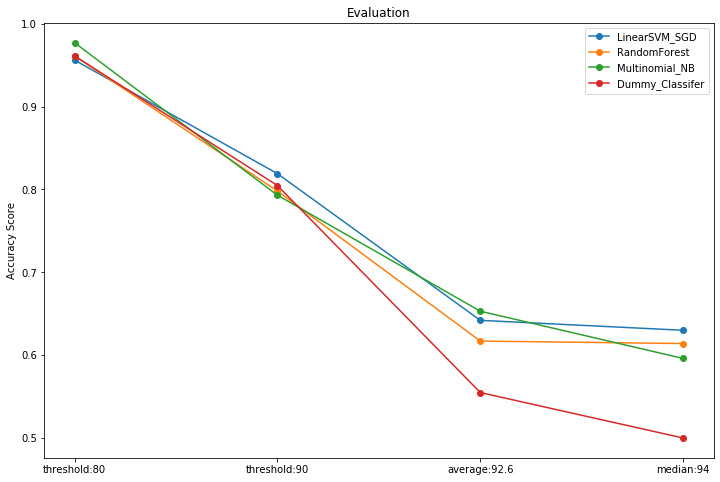

In [44]:
LinearSVM_SGD=[0.956,0.819,0.642,0.63]
RandomForest=[0.961,0.798,0.617,0.614]
Multinomial_NB=[0.977,0.793,0.653,0.596]
x=['threshold:80','threshold:90','average:92.6','median:94']

Dummy_Classifer=[1-np.sum(y_80)/1285,1-np.sum(y_90)/1285,1-np.sum(y_avg)/1285,0.5]




plt.figure(figsize = (12, 8))
plt.plot(x,LinearSVM_SGD,label='LinearSVM_SGD', marker='o')
plt.plot(x,RandomForest,label='RandomForest', marker='o')
plt.plot(x,Multinomial_NB,label='Multinomial_NB', marker='o')
plt.plot(x,Dummy_Classifer,label='Dummy_Classifer', marker='o')

plt.legend()
plt.title('Evaluation')
plt.ylabel('Accuracy Score')


In [0]:
mean_absolute_error(y_test,y_pred)

In [0]:
mean_absolute_error(y_test,y_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred,average='weighted')

0.31088082901554404

In [0]:
accuracy_score(le.transform(y_test),y_pred)

0.4430051813471503

In [0]:
le.fit(y)
y_test_labeled=le.transform(y_test) 
y_test_labeled

array([5, 5, 7, 6, 6, 5, 5, 5, 6, 7, 6, 6, 7, 7, 5, 5, 6, 5, 6, 6, 5, 7,
       5, 6, 5, 5, 5, 7, 6, 7, 7, 6, 5, 5, 6, 6, 4, 6, 4, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 7, 7, 6, 6, 7, 5, 5, 7, 5, 5, 6, 5, 6, 7, 6, 7, 6, 6,
       6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 3, 4, 6, 5, 6, 6, 6, 5, 5,
       6, 6, 5, 6, 7, 3, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 6, 7, 5, 6, 5, 5, 5, 7, 7, 6, 5, 7, 6, 4, 5, 7, 7,
       7, 7, 5, 5, 5, 5, 4, 6, 7, 5, 5, 6, 5, 6, 5, 7, 5, 5, 4, 6, 6, 5,
       6, 6, 7, 5, 6, 7, 6, 6, 5, 6, 5, 7, 7, 5, 5, 5, 6, 5, 5, 4, 5, 5,
       7, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 7, 7, 6, 5, 5,
       6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 4, 6, 6, 6, 7, 6, 6, 6, 5, 7,
       6, 6, 5, 7, 5, 5, 7, 5, 5, 7, 7, 7, 5, 4, 6, 7, 7, 5, 7, 6, 5, 5,
       7, 5, 6, 6, 6, 6, 5, 5, 6, 7, 6, 5, 5, 6, 5, 7, 7, 4, 5, 4, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 7, 5, 5, 6, 5, 6, 7, 6, 7, 5, 7, 3, 6, 5, 7,
       7, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 7,

In [0]:
f1_score(le.transform(y_test),le.transform(y_pred),average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.39348830082458897

In [0]:
mean_absolute_error(y_test,y_pred2),accuracy_score(y_test,y_pred2),f1_score(y_test,y_pred2,average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.5103626943005182, 0.5518134715025906, 0.5064252346069456)

In [0]:
np.mean(y_pred2),min(y_pred2)

(4.248704663212435, 3)

In [0]:
dfr

,1182,998,485,1077,936,1045,695,1197,1084,1078,1255,69,713,1220,500,191,604,727,1151,1163,226,66,496,731,444,1164,334,168,1000,1264,931,648,819,157,570,118,542,330,1034,30,...,398,1073,429,906,854,710,1188,377,1127,261,887,944,402,502,457,501,296,1143,81,594,447,593,858,878,1158,625,682,130,1117,1118,62,766,12,35,997,836,227,757,302,1257
Grade,4.0,4.0,5.0,4.5,4.5,4.0,4.0,4.0,4.5,5.0,4.5,4.5,5.0,5.0,4.0,4.0,4.5,4.0,4.5,4.5,4.0,5.0,4.0,4.5,4.0,4.0,4.0,5.0,4.5,5.0,5.0,4.5,4.0,4.0,4.5,4.5,3.5,4.5,3.5,4.5,...,4.5,4.0,5.0,4.5,4.0,4.5,4.5,4.5,4.0,4.5,4.5,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.5,4.5,4.0,3.5,5.0,4.5,4.5,4.5,5.0,4.5,5.0,4.0,4.5,4.5,4.5,4.0,4.5,5.0
Unnamed 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,7.0,6.0,NaN,NaN,NaN,NaN,7.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,6.0,NaN,5.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,6.0,NaN,7.0,6.0,NaN,NaN,5.0,NaN,5.0,NaN
